In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as colors
import re

sns.set()
sns.set_style("whitegrid")

out_file_path = "./"
data_file_path = "../data/"

In [2]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap


cmap_64 = plt.get_cmap("Blues")
cmap_64 = truncate_colormap(cmap_64, 0.3, 0.9)
cmap_32 = plt.get_cmap("Oranges")
cmap_32 = truncate_colormap(cmap_32, 0.3, 0.9)
cmap_16 = plt.get_cmap("Greens")
cmap_16 = truncate_colormap(cmap_16, 0.3, 0.9)


In [3]:
regex_L1 = '(?<=L1/TEX Hit Rate","%",").[.0-9_]*'
regex_L2 = '(?<=L2 Hit Rate","%",").[.0-9_]*'
regex_mpb = '(?<="Mem Pipes Busy","%",").[.0-9_]*'
regex_mb = '(?<="Mem Busy","%",").[.0-9_]*'
regex_sb = '(?<="SM Busy","%",").[.0-9_]*'
regex_rpt = '(?<="register/thread",").[.0-9_]*'

In [4]:
data_16 = pd.read_csv(
    data_file_path + "perf-fdtd3d-fp16-4090.csv",
    header=None,
    names=["dim", "gpu_time"])

data_16["order"] = np.log2(data_16["dim"] * data_16["dim"] * data_16["dim"])
data_16["TFlops"] = 728 * data_16["dim"] * data_16["dim"] * data_16["dim"] / data_16["gpu_time"] / 1e9
print(data_16)


      dim    gpu_time      order     TFlops
0    1160  101.253040  30.539727  11.222698
1    1152  100.272722  30.509775  11.099566
2    1144   95.212200  30.479614  11.447663
3    1136   94.128542  30.449241  11.338224
4    1128   92.233720  30.418654  11.328410
..    ...         ...        ...        ...
129   128    0.374081  21.000000   4.081273
130   120    0.351372  20.720672   3.580206
131   112    0.330572  20.422065   3.093993
132   104    0.308020  20.101319   2.658597
133    96    0.287809  19.754888   2.237900

[134 rows x 4 columns]


In [5]:
fdtd3d_l1_hit_rate = []
fdtd3d_l2_hit_rate = []
fdtd3d_mpb = []
fdtd3d_mb = []
fdtd3d_sb = []
fdtd3d_rpt = []

fileHandler = open(data_file_path + "ncu-fdtd3d-fp16-4090.csv", "r")
while True:
    line = fileHandler.readline()
    if not line:
        break

    str_select = re.findall(regex_L1, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_l1_hit_rate.append(np.mean(num_list_new))

    str_select = re.findall(regex_L2, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_l2_hit_rate.append(np.mean(num_list_new))

    str_select = re.findall(regex_mpb, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_mpb.append(np.mean(num_list_new))

    str_select = re.findall(regex_mb, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_mb.append(np.mean(num_list_new))

    str_select = re.findall(regex_sb, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_sb.append(np.mean(num_list_new))

    str_select = re.findall(regex_rpt, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_rpt.append(np.mean(num_list_new))

fileHandler.close()

data_16["L1"] = fdtd3d_l1_hit_rate
data_16["L2"] = fdtd3d_l2_hit_rate
data_16["mpb"] = fdtd3d_mpb
data_16["mb"] = fdtd3d_mb
data_16["sb"] = fdtd3d_sb
data_16["rpt"] = fdtd3d_rpt


data_16 = data_16.loc[:, ["order", "TFlops", "L1", "L2", "mpb", "mb", "sb", "rpt"]]
print(data_16)

/home/hemeng/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hemeng/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


         order     TFlops  L1  L2  mpb  mb  sb  rpt
0    30.539727  11.222698 NaN NaN  NaN NaN NaN  NaN
1    30.509775  11.099566 NaN NaN  NaN NaN NaN  NaN
2    30.479614  11.447663 NaN NaN  NaN NaN NaN  NaN
3    30.449241  11.338224 NaN NaN  NaN NaN NaN  NaN
4    30.418654  11.328410 NaN NaN  NaN NaN NaN  NaN
..         ...        ...  ..  ..  ...  ..  ..  ...
129  21.000000   4.081273 NaN NaN  NaN NaN NaN  NaN
130  20.720672   3.580206 NaN NaN  NaN NaN NaN  NaN
131  20.422065   3.093993 NaN NaN  NaN NaN NaN  NaN
132  20.101319   2.658597 NaN NaN  NaN NaN NaN  NaN
133  19.754888   2.237900 NaN NaN  NaN NaN NaN  NaN

[134 rows x 8 columns]


In [6]:
data_32 = pd.read_csv(
    data_file_path + "perf-fdtd3d-fp32-4090.csv",
    header=None,
    names=["dim", "gpu_time"])

data_32["order"] = np.log2(data_32["dim"] * data_32["dim"] * data_32["dim"])
data_32["TFlops"] = 728 * data_32["dim"] * data_32["dim"] * data_32["dim"] / data_32["gpu_time"] / 1e9
print(data_32)


      dim    gpu_time      order    TFlops
0    1144  121.256790  30.479614  8.988835
1    1136  123.430619  30.449241  8.646562
2    1128  117.420020  30.418654  8.898494
3    1120  116.908231  30.387849  8.748636
4    1112  113.782170  30.356823  8.797748
..    ...         ...        ...       ...
127   128    0.350599  21.000000  4.354624
128   120    0.330939  20.720672  3.801256
129   112    0.313349  20.422065  3.264052
130   104    0.290201  20.101319  2.821841
131    96    0.270178  19.754888  2.383939

[132 rows x 4 columns]


In [7]:
fdtd3d_l1_hit_rate = []
fdtd3d_l2_hit_rate = []
fdtd3d_mpb = []
fdtd3d_mb = []
fdtd3d_sb = []
fdtd3d_rpt = []

fileHandler = open(data_file_path + "ncu-fdtd3d-fp32-4090.csv", "r")
while True:
    line = fileHandler.readline()
    if not line:
        break

    str_select = re.findall(regex_L1, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_l1_hit_rate.append(np.mean(num_list_new))

    str_select = re.findall(regex_L2, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_l2_hit_rate.append(np.mean(num_list_new))

    str_select = re.findall(regex_mpb, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_mpb.append(np.mean(num_list_new))

    str_select = re.findall(regex_mb, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_mb.append(np.mean(num_list_new))

    str_select = re.findall(regex_sb, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_sb.append(np.mean(num_list_new))

    str_select = re.findall(regex_rpt, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_rpt.append(np.mean(num_list_new))

fileHandler.close()

data_32["L1"] = fdtd3d_l1_hit_rate
data_32["L2"] = fdtd3d_l2_hit_rate
data_32["mpb"] = fdtd3d_mpb
data_32["mb"] = fdtd3d_mb
data_32["sb"] = fdtd3d_sb
data_32["rpt"] = fdtd3d_rpt

data_32 = data_32.loc[:, ["order", "TFlops", "L1", "L2", "mpb", "mb", "sb", "rpt"]]
print(data_32)

         order    TFlops   L1      L2     mpb      mb      sb   rpt
0    30.479614  8.988835  0.0  57.342  36.934  18.794  13.458  80.0
1    30.449241  8.646562  0.0  58.678  35.424  18.070  13.038  80.0
2    30.418654  8.898494  0.0  59.568  37.048  18.884  13.670  80.0
3    30.387849  8.748636  0.0  60.064  35.498  18.108  13.040  80.0
4    30.356823  8.797748  0.0  56.478  36.166  18.402  13.164  80.0
..         ...       ...  ...     ...     ...     ...     ...   ...
127  21.000000  4.354624  0.0  60.938  13.924   7.114  20.788  80.0
128  20.720672  3.801256  0.0  63.090  14.802   7.552  22.620  80.0
129  20.422065  3.264052  0.0  62.380  12.822   6.560  22.384  80.0
130  20.101319  2.821841  0.0  64.148  13.002   6.638  22.604  80.0
131  19.754888  2.383939  0.0  58.738   7.820   3.996  20.774  80.0

[132 rows x 8 columns]


In [8]:
data_64 = pd.read_csv(
    data_file_path + "perf-fdtd3d-fp64-4090.csv",
    header=None,
    names=["dim", "gpu_time"])

data_64["order"] = np.log2(data_64["dim"] * data_64["dim"] * data_64["dim"])
data_64["TFlops"] = 728 * data_64["dim"] * data_64["dim"] * data_64["dim"] / data_64["gpu_time"] / 1e9
print(data_64)


     dim    gpu_time      order    TFlops
0    904  221.757789  29.460537  2.425257
1    896  219.621379  29.422065  2.384409
2    888  217.611890  29.383248  2.342543
3    880  215.193810  29.344079  2.305418
4    872  213.105271  29.304553  2.265096
..   ...         ...        ...       ...
97   128    2.334561  21.000000  0.653967
98   120    2.200441  20.720672  0.571696
99   112    2.044291  20.422065  0.500314
100  104    1.908250  20.101319  0.429137
101   96    1.755669  19.754888  0.366862

[102 rows x 4 columns]


In [9]:
fdtd3d_l1_hit_rate = []
fdtd3d_l2_hit_rate = []
fdtd3d_mpb_hit_rate = []
fdtd3d_mb_hit_rate = []
fdtd3d_sb_hit_rate = []


fileHandler = open(data_file_path + "ncu-fdtd3d-fp64-4090.csv", "r")
while True:
    line = fileHandler.readline()
    if not line:
        break

    str_select = re.findall(regex_L1, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_l1_hit_rate.append(np.mean(num_list_new))

    str_select = re.findall(regex_L2, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_l2_hit_rate.append(np.mean(num_list_new))

    str_select = re.findall(regex_mpb, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_mpb_hit_rate.append(np.mean(num_list_new))

    str_select = re.findall(regex_mb, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_mb_hit_rate.append(np.mean(num_list_new))

    str_select = re.findall(regex_sb, line)
    num_list_new = [float(i) for i in str_select]
    fdtd3d_sb_hit_rate.append(np.mean(num_list_new))

fileHandler.close()

data_64["L1"] = fdtd3d_l1_hit_rate
data_64["L2"] = fdtd3d_l2_hit_rate
data_64["mpb"] = fdtd3d_mpb_hit_rate
data_64["mb"] = fdtd3d_mb_hit_rate
data_64["sb"] = fdtd3d_sb_hit_rate

data_64 = data_64.loc[:, ["order", "TFlops", "L1", "L2", "mpb", "mb", "sb"]]
print(data_64)

         order    TFlops   L1      L2     mpb     mb      sb
0    29.460537  2.425257  0.0  59.104  20.170  9.050  76.040
1    29.422065  2.384409  0.0  58.820  19.150  8.638  75.884
2    29.383248  2.342543  0.0  58.866  19.150  8.600  75.884
3    29.344079  2.305418  0.0  59.228  18.850  8.496  75.976
4    29.304553  2.265096  0.0  59.246  18.860  8.460  76.032
..         ...       ...  ...     ...     ...    ...     ...
97   21.000000  0.653967  0.0  57.824   5.098  2.308  77.258
98   20.720672  0.571696  0.0  59.706   5.116  2.310  77.508
99   20.422065  0.500314  0.0  58.766   4.474  2.020  77.508
100  20.101319  0.429137  0.0  60.542   4.484  2.000  77.600
101  19.754888  0.366862  0.0  55.876   2.870  1.300  77.136

[102 rows x 7 columns]


In [10]:
data = pd.DataFrame()
data['order'] = data_64['order']
data['fp64_perf'] = data_64['TFlops']
data['fp32_perf'] = data_32['TFlops']
data['fp16_perf'] = data_16['TFlops']
data['fp32_speedup'] = data_32['TFlops'] / data_64['TFlops']
data['fp16_speedup'] = data_16['TFlops'] / data_64['TFlops']
print(data)
print(max(data['fp16_speedup']))
print(max(data['fp32_speedup']))


         order  fp64_perf  fp32_perf  fp16_perf  fp32_speedup  fp16_speedup
0    29.460537   2.425257   8.988835  11.222698      3.706343      4.627426
1    29.422065   2.384409   8.646562  11.099566      3.626291      4.655059
2    29.383248   2.342543   8.898494  11.447663      3.798646      4.886852
3    29.344079   2.305418   8.748636  11.338224      3.794816      4.918078
4    29.304553   2.265096   8.797748  11.328410      3.884051      5.001293
..         ...        ...        ...        ...           ...           ...
97   21.000000   0.653967   7.968635   9.598882     12.185066     14.677922
98   20.720672   0.571696   7.593514   9.437313     13.282426     16.507563
99   20.422065   0.500314   9.064915   9.008450     18.118449     18.005589
100  20.101319   0.429137   9.668695   8.744587     22.530547     20.377138
101  19.754888   0.366862   9.362919   8.370655     25.521655     22.816921

[102 rows x 6 columns]
22.81692051174953
25.52165465756253


In [11]:
pd.set_option('display.max_rows', None)
print(max(data_16["TFlops"]))
print(max(data_32["TFlops"]))
print(max(data_64["TFlops"]))

15.11469667778744
10.289249071072886
2.5004549592496534


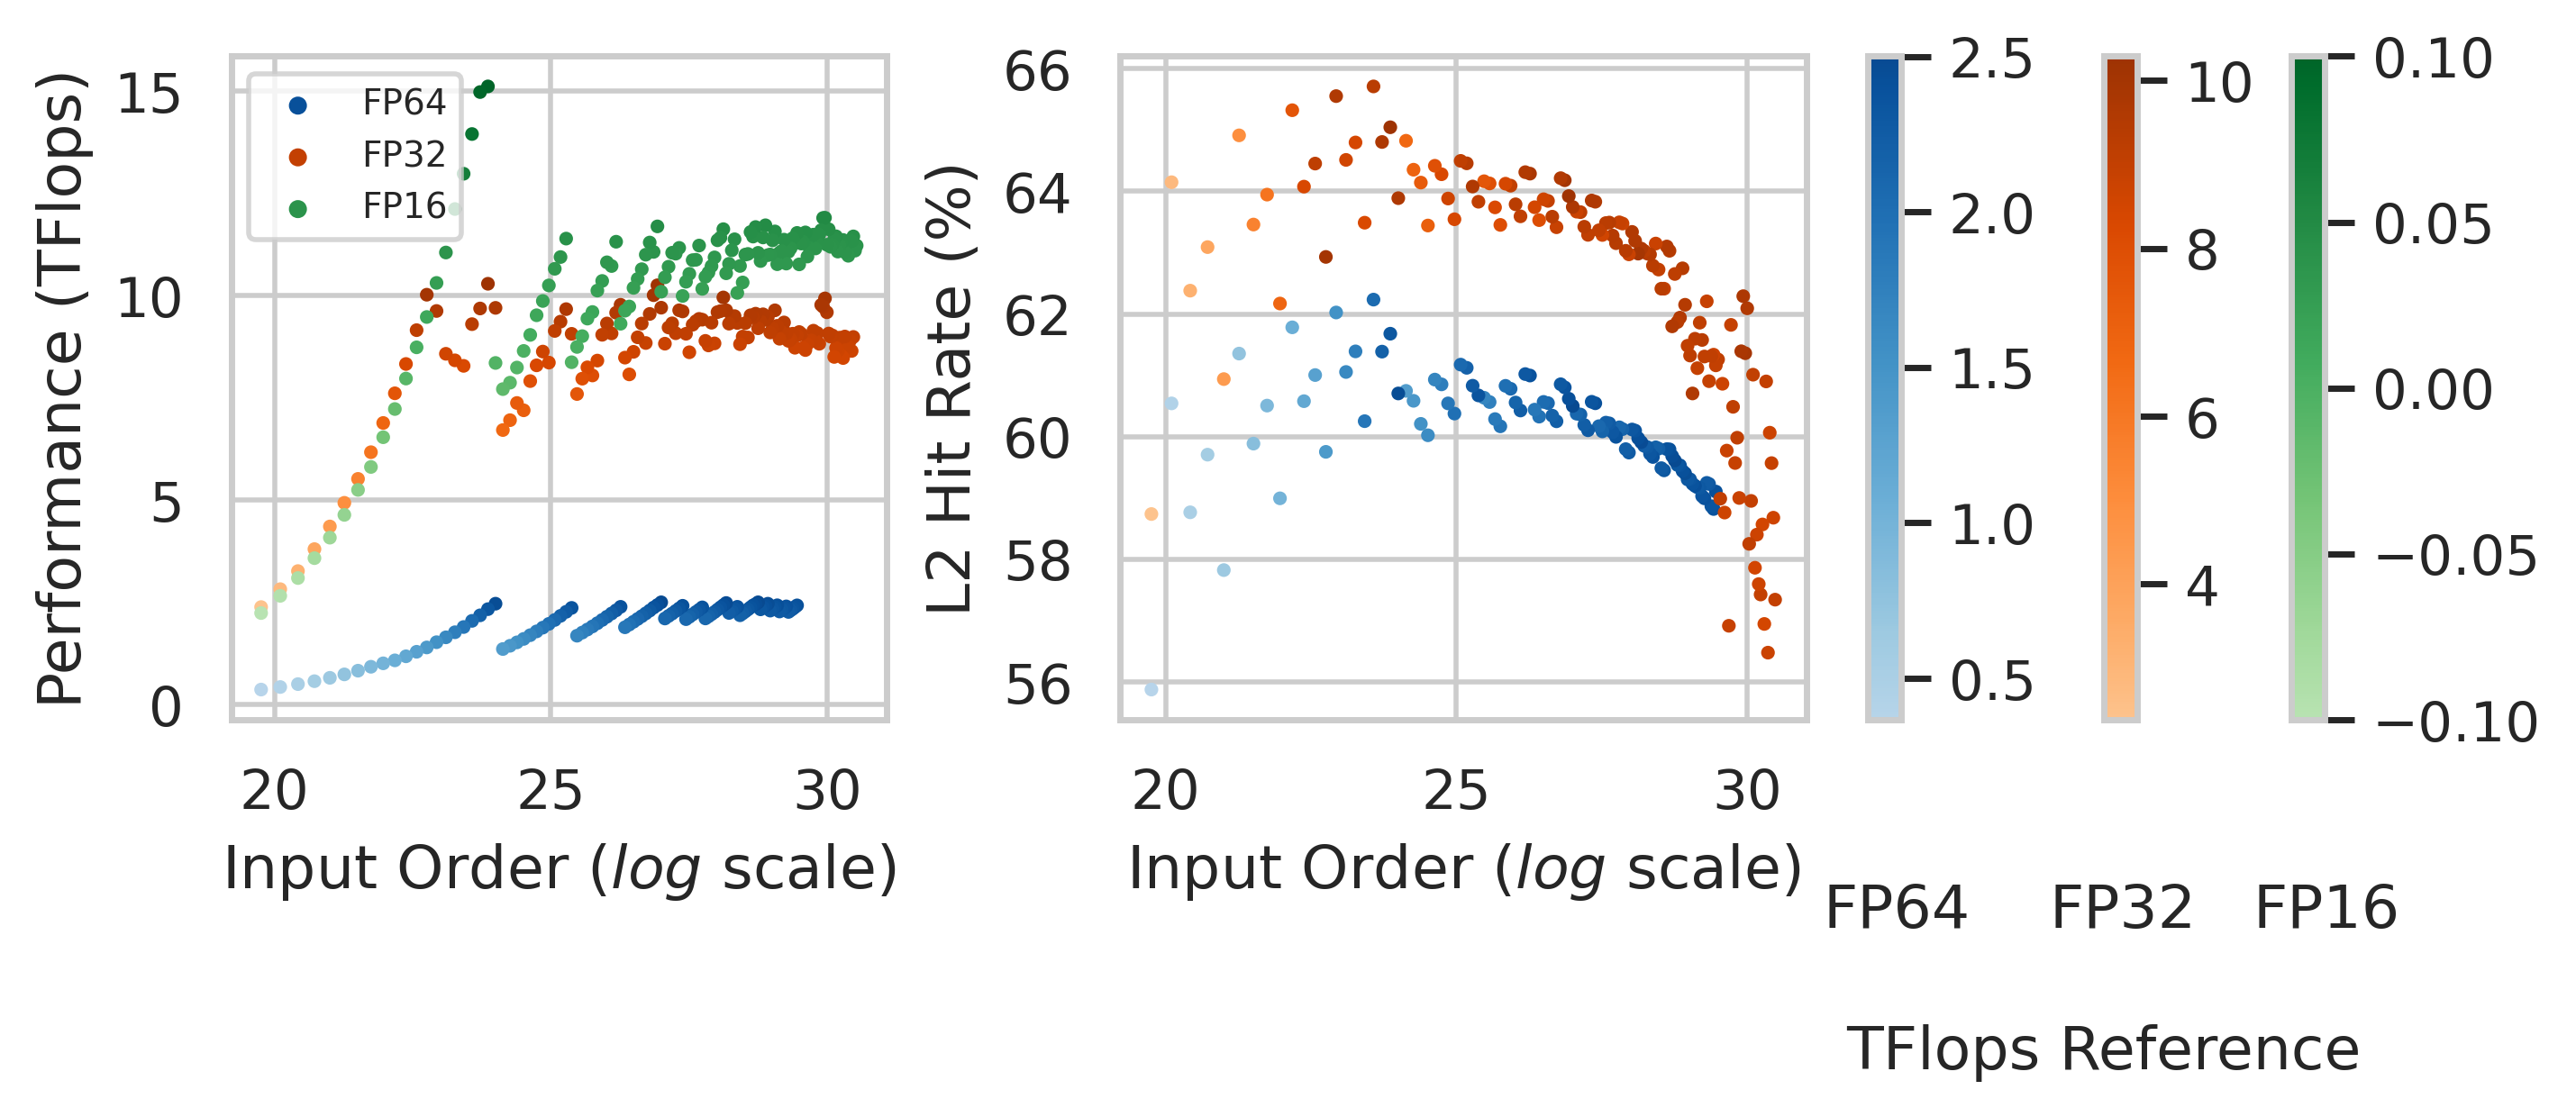

In [12]:
plt.figure(figsize=(11, 11), dpi=400)
plt.subplot(4,4,2)
# plt.title("FDTD3d's Performance")
plt.xlabel("Input Order ($log$ scale)")
plt.ylabel("Performance (TFlops)")
plt.scatter(data_64["order"], data_64["TFlops"], label='FP64', c=data_64["TFlops"], cmap=cmap_64, marker='o', s=3)
plt.scatter(data_32["order"], data_32["TFlops"], label='FP32', c=data_32["TFlops"], cmap=cmap_32, marker='o', s=3)
plt.scatter(data_16["order"], data_16["TFlops"], label='FP16', c=data_16["TFlops"], cmap=cmap_16, marker='o', s=3)
plt.legend(fontsize=7, markerscale=1.5)

plt.subplot(4,2,2)
# plt.title("L2 Hit Rate Analysis of FDTD3d")
plt.xlabel("Input Order ($log$ scale)")
plt.ylabel("L2 Hit Rate (%)")
fp64 = plt.scatter(data_64["order"], data_64["L2"], label='FP64', c=data_64["TFlops"], cmap=cmap_64, marker='o', s=3)
fp32 = plt.scatter(data_32["order"], data_32["L2"], label='FP32', c=data_32["TFlops"], cmap=cmap_32, marker='o', s=3)
fp16 = plt.scatter(data_16["order"], data_16["L2"], label='FP16', c=data_16["TFlops"], cmap=cmap_16, marker='o', s=3)
# plt.legend(prop={'size':7})

plt.colorbar(fp16, pad=0.01)
plt.colorbar(fp32, pad=0.09)
plt.colorbar(fp64, pad=0.07)

plt.text(38.7,52,"FP16")
plt.text(35.2,52,"FP32")
plt.text(31.3,52,"FP64")
plt.text(31.7,49.7,"TFlops Reference")
# plt.tight_layout()
plt.subplots_adjust(wspace=0.23)
plt.savefig('FDTD3d_4090.pdf',
            dpi = 400,
            format = "pdf",
            bbox_inches = 'tight',
            pad_inches = 0.0)

#plt.grid()
plt.show()